In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# dados = pd.read_table('/home/luciano/ITPS/metadata_brazil_variants.tsv')
dados = pd.read_table('metadata_brazil_variants.tsv')

In [3]:
dados

,identifier,date,pango_lineage,variant,country,state,state_code,ibge_code,age,sex,lat,long
0,f13d424ea9d922139c0fdf8248983cb7bf70ab12,2020-03-01,B.1.1.33,Other variants,Brazil,Rio de Janeiro,RJ,BR33,?,?,-22.911014,-43.209373
1,1b036bc8f04309aeae963ff7350b0f5253595e76,2020-03-01,B.1.1,Other variants,Brazil,Rio Grande do Sul,RS,BR43,53,Male,-29.842528,-53.768058
2,d7159e22a06c290aedfd0c51f036e81f60dd2210,2020-03-01,B.1.1,Other variants,Brazil,Rio Grande do Sul,RS,BR43,47,Female,-29.842528,-53.768058
3,98b49cb92dc2516a6b061f16c27b3a12e9404885,2020-03-01,B.1,Other variants,Brazil,Rio Grande do Sul,RS,BR43,82,Male,-29.842528,-53.768058
4,a5ced01b07bfa9705841a45c5b236be5590e7fd1,2020-03-04,B,Other variants,Brazil,Distrito Federal,DF,BR53,52,Female,-15.775446,-47.797089
...,...,...,...,...,...,...,...,...,...,...,...,...
92593,858abbf01e1d950b739ec92c8540aea164119d95,2021-12-29,BA.1,Omicron,Brazil,Pernambuco,PE,BR26,9,Male,-8.411632,-37.591970
92594,fbda02031ff4a163ad92e5be16b6a041a9747238,2021-12-29,BA.1,Omicron,Brazil,Pernambuco,PE,BR26,37,Female,-8.411632,-37.591970
92595,f381bbacba22f7cecd5dc47885d6e0f9b9f91dea,2021-12-29,BA.1,Omicron,Brazil,Pernambuco,PE,BR26,64,Female,-8.411632,-37.591970
92596,ef065e675a53838cfbd28d004386bf8f56ae0c03,2021-12-29,BA.1,Omicron,Brazil,Pernambuco,PE,BR26,43,Male,-8.411632,-37.591970


In [4]:
dados.isna().sum().sum()

0

In [5]:
dados.dtypes

identifier        object
date              object
pango_lineage     object
variant           object
country           object
state             object
state_code        object
ibge_code         object
age               object
sex               object
lat              float64
long             float64
dtype: object

In [6]:
dados['date'] = pd.to_datetime(dados['date'])
dados.dtypes

identifier               object
date             datetime64[ns]
pango_lineage            object
variant                  object
country                  object
state                    object
state_code               object
ibge_code                object
age                      object
sex                      object
lat                     float64
long                    float64
dtype: object

In [7]:
dados

,identifier,date,pango_lineage,variant,country,state,state_code,ibge_code,age,sex,lat,long
0,f13d424ea9d922139c0fdf8248983cb7bf70ab12,2020-03-01,B.1.1.33,Other variants,Brazil,Rio de Janeiro,RJ,BR33,?,?,-22.911014,-43.209373
1,1b036bc8f04309aeae963ff7350b0f5253595e76,2020-03-01,B.1.1,Other variants,Brazil,Rio Grande do Sul,RS,BR43,53,Male,-29.842528,-53.768058
2,d7159e22a06c290aedfd0c51f036e81f60dd2210,2020-03-01,B.1.1,Other variants,Brazil,Rio Grande do Sul,RS,BR43,47,Female,-29.842528,-53.768058
3,98b49cb92dc2516a6b061f16c27b3a12e9404885,2020-03-01,B.1,Other variants,Brazil,Rio Grande do Sul,RS,BR43,82,Male,-29.842528,-53.768058
4,a5ced01b07bfa9705841a45c5b236be5590e7fd1,2020-03-04,B,Other variants,Brazil,Distrito Federal,DF,BR53,52,Female,-15.775446,-47.797089
...,...,...,...,...,...,...,...,...,...,...,...,...
92593,858abbf01e1d950b739ec92c8540aea164119d95,2021-12-29,BA.1,Omicron,Brazil,Pernambuco,PE,BR26,9,Male,-8.411632,-37.591970
92594,fbda02031ff4a163ad92e5be16b6a041a9747238,2021-12-29,BA.1,Omicron,Brazil,Pernambuco,PE,BR26,37,Female,-8.411632,-37.591970
92595,f381bbacba22f7cecd5dc47885d6e0f9b9f91dea,2021-12-29,BA.1,Omicron,Brazil,Pernambuco,PE,BR26,64,Female,-8.411632,-37.591970
92596,ef065e675a53838cfbd28d004386bf8f56ae0c03,2021-12-29,BA.1,Omicron,Brazil,Pernambuco,PE,BR26,43,Male,-8.411632,-37.591970


In [8]:
dias = dados['date'].value_counts().rename_axis('date').reset_index(name='counts')
# dias.to_csv('dias.csv', index=False)
dias

,date,counts
0,2021-09-13,980
1,2021-06-07,947
2,2021-07-12,924
3,2021-06-28,888
4,2021-07-19,849
...,...,...
662,2020-09-13,2
663,2020-09-20,1
664,2020-11-08,1
665,2020-09-06,1


In [9]:
dias.dtypes

date      datetime64[ns]
counts             int64
dtype: object

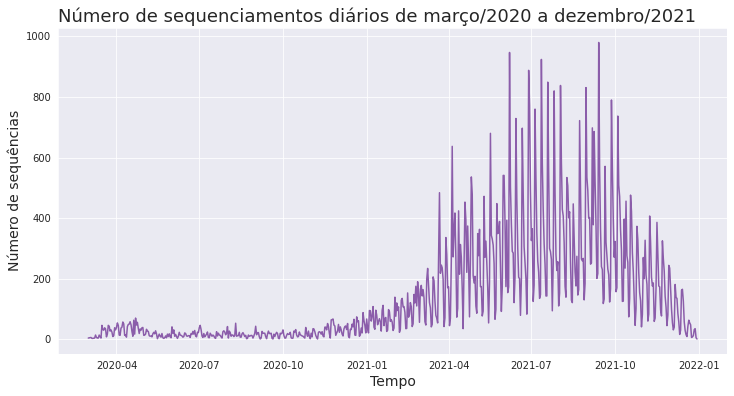

In [44]:
sns.set_palette('BuPu_r', 2)
sns.set_style('darkgrid')
ax1 = sns.lineplot(x='date', y='counts', data=dias)
ax1.figure.set_size_inches(12,6)
ax1.set_title('Número de sequenciamentos diários de março/2020 a dezembro/2021', loc='left', fontsize=18)
ax1.set_xlabel('Tempo', fontsize=14)
ax1.set_ylabel('Número de sequências', fontsize=14)
ax1 = ax1

In [11]:
dias_sort = dias.sort_values(by='date')
dias_sort

,date,counts
635,2020-03-01,4
622,2020-03-04,6
650,2020-03-05,3
651,2020-03-06,3
638,2020-03-08,4
...,...,...
554,2021-12-26,12
409,2021-12-27,32
398,2021-12-28,35
632,2021-12-29,5


In [12]:
dias_sort['aumento'] = dias_sort['counts'].diff()
dias_sort.head()

,date,counts,aumento
635,2020-03-01,4,NaN
622,2020-03-04,6,2.0
650,2020-03-05,3,-3.0
651,2020-03-06,3,0.0
638,2020-03-08,4,1.0


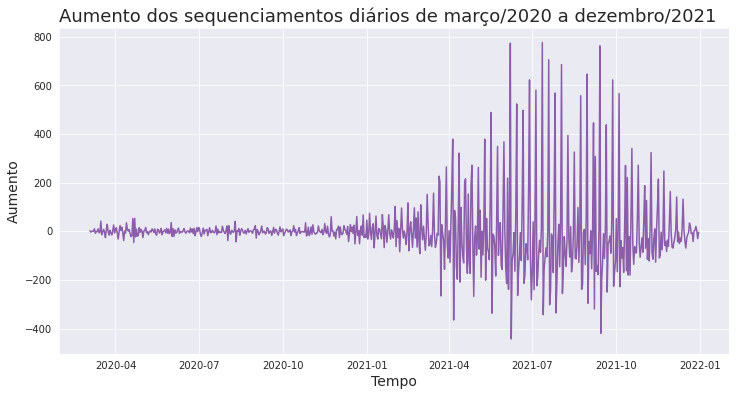

In [43]:
sns.set_palette('BuPu_r', 2)
sns.set_style('darkgrid')
ax2 = sns.lineplot(x='date', y='aumento', data=dias_sort)
ax2.figure.set_size_inches(12,6)
ax2.set_title('Aumento dos sequenciamentos diários de março/2020 a dezembro/2021', loc='left', fontsize=18)
ax2.set_xlabel('Tempo', fontsize=14)
ax2.set_ylabel('Aumento', fontsize=14)
ax2 = ax2

In [14]:
dias_sort['aceleracao'] = dias_sort['aumento'].diff()
dias_sort.head()

,date,counts,aumento,aceleracao
635,2020-03-01,4,NaN,NaN
622,2020-03-04,6,2.0,NaN
650,2020-03-05,3,-3.0,-5.0
651,2020-03-06,3,0.0,3.0
638,2020-03-08,4,1.0,1.0


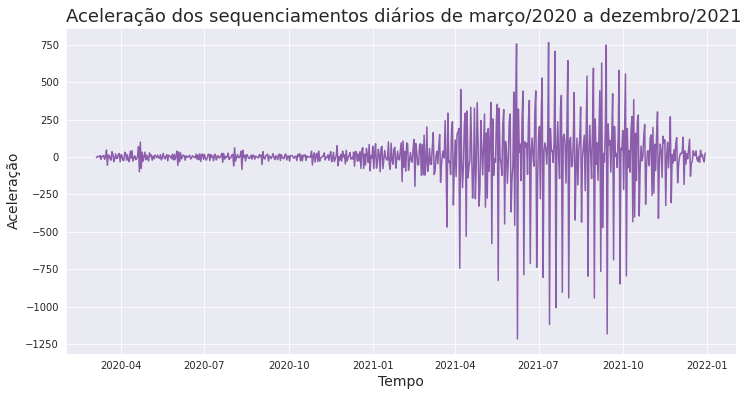

In [42]:
sns.set_palette('BuPu_r', 2)
sns.set_style('darkgrid')
ax3 = sns.lineplot(x='date', y='aceleracao', data=dias_sort)
ax3.figure.set_size_inches(12,6)
ax3.set_title('Aceleração dos sequenciamentos diários de março/2020 a dezembro/2021', loc='left', fontsize=18)
ax3.set_xlabel('Tempo', fontsize=14)
ax3.set_ylabel('Aceleração', fontsize=14)
ax3 = ax3

In [16]:
dias_sort['media_movel'] = dias_sort['counts'].rolling(7).mean()
dias_sort.head(7)

,date,counts,aumento,aceleracao,media_movel
635,2020-03-01,4,NaN,NaN,NaN
622,2020-03-04,6,2.0,NaN,NaN
650,2020-03-05,3,-3.0,-5.0,NaN
651,2020-03-06,3,0.0,3.0,NaN
638,2020-03-08,4,1.0,1.0,NaN
528,2020-03-09,14,10.0,9.0,NaN
619,2020-03-10,6,-8.0,-18.0,5.714286


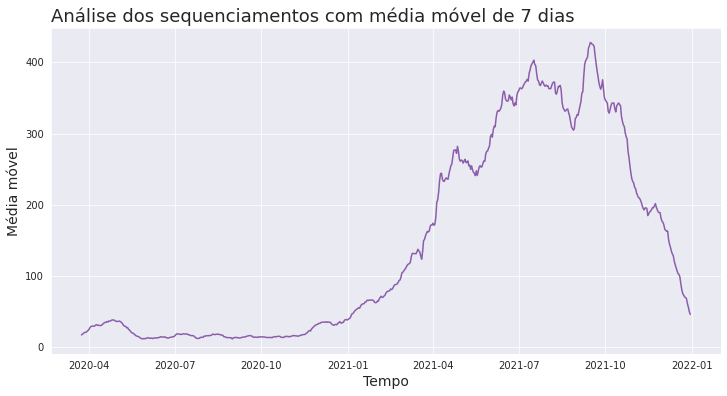

In [41]:
sns.set_palette('BuPu_r', 2)
sns.set_style('darkgrid')
ax4 = sns.lineplot(x='date', y='media_movel', data=dias_sort)
ax4.figure.set_size_inches(12,6)
ax4.set_title('Análise dos sequenciamentos com média móvel de 7 dias', loc='left', fontsize=18)
ax4.set_xlabel('Tempo', fontsize=14)
ax4.set_ylabel('Média móvel', fontsize=14)
ax4 = ax4

In [18]:
dias_sort['media_movel'] = dias_sort['counts'].rolling(21).mean()
dias_sort.head(21)

,date,counts,aumento,aceleracao,media_movel
635,2020-03-01,4,NaN,NaN,NaN
622,2020-03-04,6,2.0,NaN,NaN
650,2020-03-05,3,-3.0,-5.0,NaN
651,2020-03-06,3,0.0,3.0,NaN
638,2020-03-08,4,1.0,1.0,NaN
528,2020-03-09,14,10.0,9.0,NaN
619,2020-03-10,6,-8.0,-18.0,NaN
639,2020-03-11,4,-2.0,6.0,NaN
640,2020-03-12,4,0.0,2.0,NaN
529,2020-03-13,14,10.0,10.0,NaN


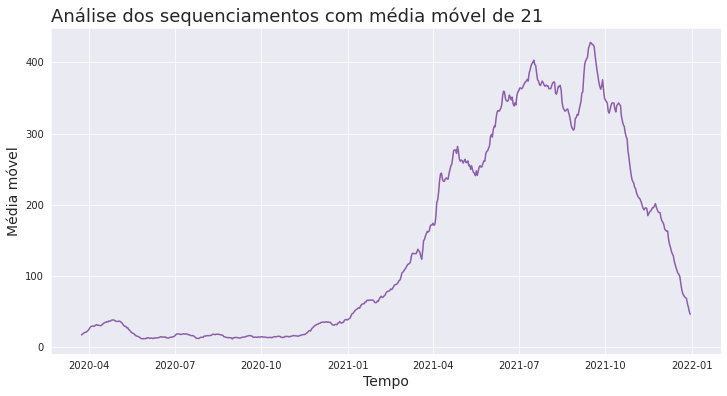

In [35]:
sns.set_palette('BuPu_r', 2)
sns.set_style('darkgrid')
ax5 = sns.lineplot(x='date', y='media_movel', data=dias_sort)
ax5.figure.set_size_inches(12,6)
ax5.set_title('Análise dos sequenciamentos com média móvel de 21', loc='left', fontsize=18)
ax5.set_xlabel('Tempo', fontsize=14)
ax5.set_ylabel('Média móvel', fontsize=14)
ax5 = ax5

In [20]:
pip install pymannkendall

In [21]:
import pymannkendall as mk

In [22]:
resultado = mk.original_test(dias_sort['counts'])
nomes = ['Tendência','Presença de tendência','p-valor','Estatística do teste',
         'Tau Kendall','Pontuação Kendall','Variância S','Declive','Intercepto']
for i,j in zip(nomes,resultado):
  print(i,":",j)

Tendência : increasing
Presença de tendência : True
p-valor : 0.0
Estatística do teste : 19.72400268845819
Tau Kendall : 0.5104564834699767
Pontuação Kendall : 113378.0
Variância S : 33041504.666666668
Declive : 0.34572490706319703
Intercepto : -61.12639405204462


In [23]:
dados

,identifier,date,pango_lineage,variant,country,state,state_code,ibge_code,age,sex,lat,long
0,f13d424ea9d922139c0fdf8248983cb7bf70ab12,2020-03-01,B.1.1.33,Other variants,Brazil,Rio de Janeiro,RJ,BR33,?,?,-22.911014,-43.209373
1,1b036bc8f04309aeae963ff7350b0f5253595e76,2020-03-01,B.1.1,Other variants,Brazil,Rio Grande do Sul,RS,BR43,53,Male,-29.842528,-53.768058
2,d7159e22a06c290aedfd0c51f036e81f60dd2210,2020-03-01,B.1.1,Other variants,Brazil,Rio Grande do Sul,RS,BR43,47,Female,-29.842528,-53.768058
3,98b49cb92dc2516a6b061f16c27b3a12e9404885,2020-03-01,B.1,Other variants,Brazil,Rio Grande do Sul,RS,BR43,82,Male,-29.842528,-53.768058
4,a5ced01b07bfa9705841a45c5b236be5590e7fd1,2020-03-04,B,Other variants,Brazil,Distrito Federal,DF,BR53,52,Female,-15.775446,-47.797089
...,...,...,...,...,...,...,...,...,...,...,...,...
92593,858abbf01e1d950b739ec92c8540aea164119d95,2021-12-29,BA.1,Omicron,Brazil,Pernambuco,PE,BR26,9,Male,-8.411632,-37.591970
92594,fbda02031ff4a163ad92e5be16b6a041a9747238,2021-12-29,BA.1,Omicron,Brazil,Pernambuco,PE,BR26,37,Female,-8.411632,-37.591970
92595,f381bbacba22f7cecd5dc47885d6e0f9b9f91dea,2021-12-29,BA.1,Omicron,Brazil,Pernambuco,PE,BR26,64,Female,-8.411632,-37.591970
92596,ef065e675a53838cfbd28d004386bf8f56ae0c03,2021-12-29,BA.1,Omicron,Brazil,Pernambuco,PE,BR26,43,Male,-8.411632,-37.591970


In [24]:
dados.dtypes

identifier               object
date             datetime64[ns]
pango_lineage            object
variant                  object
country                  object
state                    object
state_code               object
ibge_code                object
age                      object
sex                      object
lat                     float64
long                    float64
dtype: object

In [25]:
grupos = dados.groupby(dados.variant)
om = grupos.get_group("Omicron")
al = grupos.get_group("Alpha")
ga = grupos.get_group("Gamma")
de = grupos.get_group("Delta")
be = grupos.get_group("Beta")
dados3 = pd.concat([om, al, ga, de, be])
dados3

,identifier,date,pango_lineage,variant,country,state,state_code,ibge_code,age,sex,lat,long
89900,f09d9017ba369cd694036becb33b786b1211b650,2021-11-25,BA.1,Omicron,Brazil,Distrito Federal,DF,BR53,42,Male,-15.775446,-47.797089
89965,bcb09b9ff5662cf0814c10a6b44b5f03c0ee009b,2021-11-25,BA.1,Omicron,Brazil,São Paulo,SP,BR35,?,?,-23.550651,-46.633382
89966,c15fc1e0d4c361be3b33d0a01834df323c01e5e2,2021-11-25,BA.1,Omicron,Brazil,São Paulo,SP,BR35,?,?,-23.550651,-46.633382
90787,d8e950e3fa272d33f2ca974bdc294d447b1e7506,2021-12-01,BA.1,Omicron,Brazil,Distrito Federal,DF,BR53,42,Male,-15.775446,-47.797089
90801,b784fc81c9fe4967d0f0cd79b7dad6b2f503585b,2021-12-01,BA.1,Omicron,Brazil,São Paulo,SP,BR35,21,Female,-23.550651,-46.633382
...,...,...,...,...,...,...,...,...,...,...,...,...
12626,cc50ad660af43a364d171bd6af16796815d51b6e,2021-03-10,B.1.351,Beta,Brazil,São Paulo,SP,BR35,?,?,-23.550651,-46.633382
16890,50c6eb3b9d8c54daf88d1e1cefdd2af390031b76,2021-04-05,B.1.351,Beta,Brazil,São Paulo,SP,BR35,?,?,-23.550651,-46.633382
16918,242c894725e8ce4e162247817992d9100f4ff681,2021-04-05,B.1.351,Beta,Brazil,São Paulo,SP,BR35,?,?,-23.550651,-46.633382
16919,454c39d6db57da5ffad3ed57fef7d25c0c963119,2021-04-05,B.1.351,Beta,Brazil,São Paulo,SP,BR35,53,Female,-23.550651,-46.633382


In [26]:
dados2 = dados.sample(frac=0.1,random_state=60)
dados2

,identifier,date,pango_lineage,variant,country,state,state_code,ibge_code,age,sex,lat,long
14900,5ba61beafe5636dd2248f786b4914209cecf3cf7,2021-03-24,B.1.1.7,Alpha,Brazil,São Paulo,SP,BR35,?,?,-23.550651,-46.633382
24866,d33d15340d43076bf0180291cd38fe49bf33466a,2021-05-04,P.1.10.1,Gamma,Brazil,São Paulo,SP,BR35,54,Male,-23.550651,-46.633382
8773,b5ac5849248d34d0f4d88700995797fb83a2f054,2021-02-04,P.1,Gamma,Brazil,Minas Gerais,MG,BR31,21,Female,-18.526484,-44.158865
15903,f081495a1b9307c42ee14831bbc2f7f32a889886,2021-03-30,P.1,Gamma,Brazil,Paraná,PR,BR41,9,?,-24.484219,-51.814887
88093,2df5eae533ff1232b0cabc72a4222ab26e3a2859,2021-11-16,AY.99.1,Delta,Brazil,Rio de Janeiro,RJ,BR33,58,Male,-22.911014,-43.209373
...,...,...,...,...,...,...,...,...,...,...,...,...
86013,18787f3f1cd2b049a2777eb88b54c9397d4e745b,2021-11-05,AY.99.2,Delta,Brazil,Paraíba,PB,BR25,49,Male,-7.121937,-36.724685
22117,aee2185d9bf0504914290310f7d6685740497e0d,2021-04-23,B.1.1,Other variants,Brazil,São Paulo,SP,BR35,?,?,-23.550651,-46.633382
74709,5ad1798158e9fb0357d04e49dc1cb942ffc1afef,2021-09-26,AY.99.2,Delta,Brazil,Rio de Janeiro,RJ,BR33,72,Male,-22.911014,-43.209373
20498,43877bde218839ecfa3bb5792b92054ce1daf28e,2021-04-18,P.1.14,Gamma,Brazil,São Paulo,SP,BR35,?,?,-23.550651,-46.633382


In [27]:
# ax6 = sns.swarmplot(x="state_code", y="date", hue="variant", data=dados2)
# ax6.figure.set_size_inches(14,6)
# ax6.legend(loc = 2, bbox_to_anchor = (1,1))
# ax6 = ax6

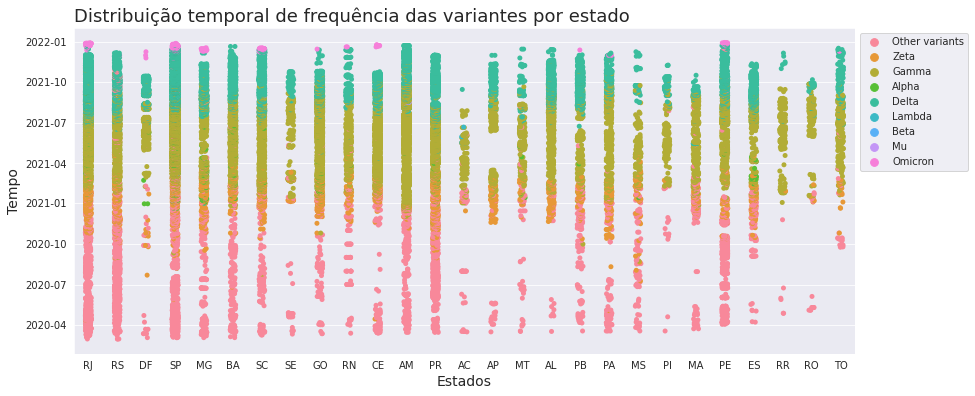

In [28]:
ax6 = sns.stripplot(x="state_code", y="date", hue="variant", data=dados)
ax6.figure.set_size_inches(14,6)
ax6.legend(loc = 2, bbox_to_anchor = (1,1))
ax6.set_title('Distribuição temporal de frequência das variantes por estado', loc='left', fontsize=18)
ax6.set_xlabel('Estados', fontsize=14)
ax6.set_ylabel('Tempo', fontsize=14)
ax6 = ax6

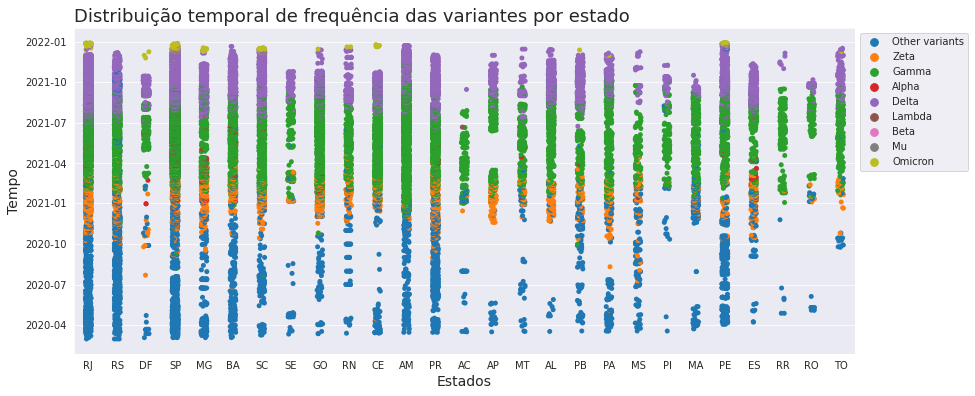

In [29]:
ax7 = sns.stripplot(x="state_code", y="date", hue="variant", data=dados, palette="tab10")
ax7.figure.set_size_inches(14,6)
ax7.legend(loc = 2, bbox_to_anchor = (1,1))
ax7.set_title('Distribuição temporal de frequência das variantes por estado', loc='left', fontsize=18)
ax7.set_xlabel('Estados', fontsize=14)
ax7.set_ylabel('Tempo', fontsize=14)
ax7 = ax7

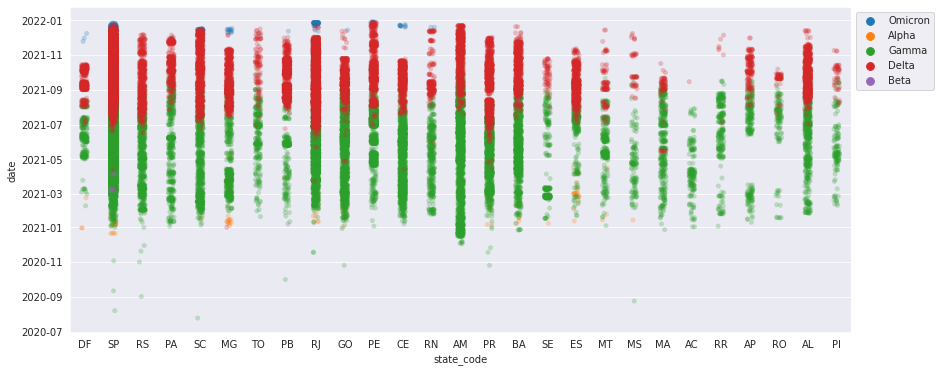

In [30]:
ax8 = sns.stripplot(x="state_code", y="date", hue="variant", data=dados3, palette="tab10", alpha=.25)
ax8.figure.set_size_inches(14,6)
ax8.legend(loc = 2, bbox_to_anchor = (1,1))
ax8 = ax8

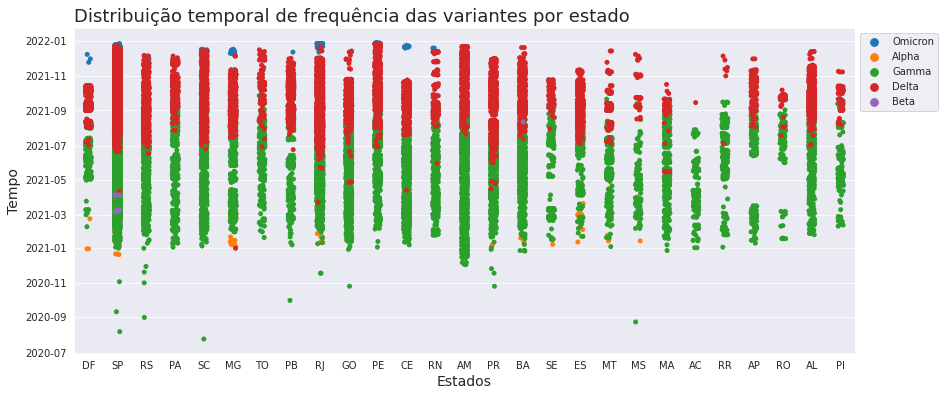

In [31]:
ax9 = sns.stripplot(x="state_code", y="date", hue="variant", data=dados3, palette="tab10")
ax9.figure.set_size_inches(14,6)
ax9.legend(loc = 2, bbox_to_anchor = (1,1))
ax9.set_title('Distribuição temporal de frequência das variantes por estado', loc='left', fontsize=18)
ax9.set_xlabel('Estados', fontsize=14)
ax9.set_ylabel('Tempo', fontsize=14)
ax9 = ax9